# Support Vector Machine

# Telecom Churn data

In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import preprocessing
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import seaborn as sns
import graphviz
from sklearn import tree
from matplotlib.pylab import rcParams
import warnings
warnings.filterwarnings("ignore")
rcParams['figure.figsize'] = 15, 6

In [2]:
df = pd.read_csv("OnlineNewsPopularity.csv")
df.shape

(39644, 61)

# Visualizing Missing Values 

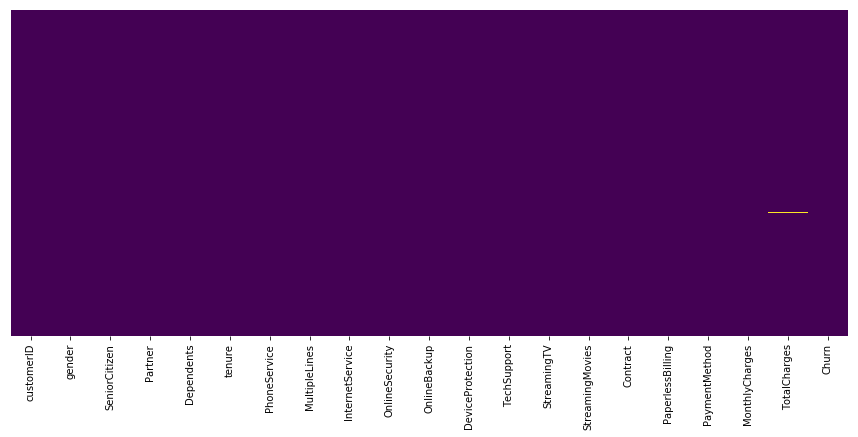

In [3]:
df = pd.read_csv("Telco-Customer-Churn.csv")
df= df.replace(' ', np.NaN)
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
df['TotalCharges']=df['TotalCharges'].astype("float")

In [4]:
# Checking Missing Values
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

# Dropping 11 Missing Values = 1.5 % of the Data

In [5]:
df.dropna(inplace=True)

In [6]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


# Changing SeniorCitizen from int to categorical


In [7]:
df['SeniorCitizen']=pd.Categorical(df['SeniorCitizen']) 

In [8]:
df.dtypes

customerID            object
gender                object
SeniorCitizen       category
Partner               object
Dependents            object
tenure                 int64
PhoneService          object
MultipleLines         object
InternetService       object
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract              object
PaperlessBilling      object
PaymentMethod         object
MonthlyCharges       float64
TotalCharges         float64
Churn                 object
dtype: object

# Dropping Unique Customer Id , as it won't help us anyways

In [9]:
if(df.columns.contains("customerID")):
    df.drop("customerID",1,inplace=True)

In [10]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [11]:
numerics = ['float64', 'int64']
numericalValues = df.select_dtypes(include=numerics)
objectValues = df.select_dtypes(exclude=numerics)

In [12]:
numericalValues.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [13]:
objectValues.describe().T

,count,unique,top,freq
gender,7032,2,Male,3549
SeniorCitizen,7032,2,0,5890
Partner,7032,2,No,3639
Dependents,7032,2,No,4933
PhoneService,7032,2,Yes,6352
MultipleLines,7032,3,No,3385
InternetService,7032,3,Fiber optic,3096
OnlineSecurity,7032,3,No,3497
OnlineBackup,7032,3,No,3087
DeviceProtection,7032,3,No,3094


In [14]:
numericalValues = pd.concat([numericalValues,df["Churn"]],axis=1)
numericalValues.head()

,tenure,MonthlyCharges,TotalCharges,Churn
0,1,29.85,29.85,No
1,34,56.95,1889.50,No
2,2,53.85,108.15,Yes
3,45,42.30,1840.75,No
4,2,70.70,151.65,Yes


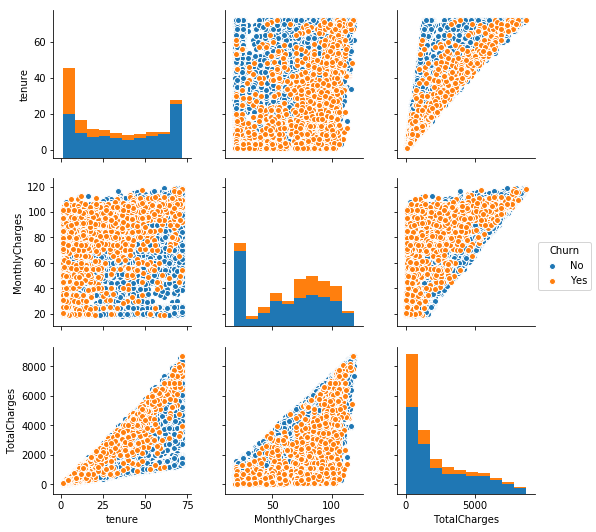

In [15]:
sns.pairplot(numericalValues,hue="Churn")

## Clearly indicating Monthly Charges is a good candidate for decision tree

# Object Value plots to show if we visually get to know that churn is based on any feature

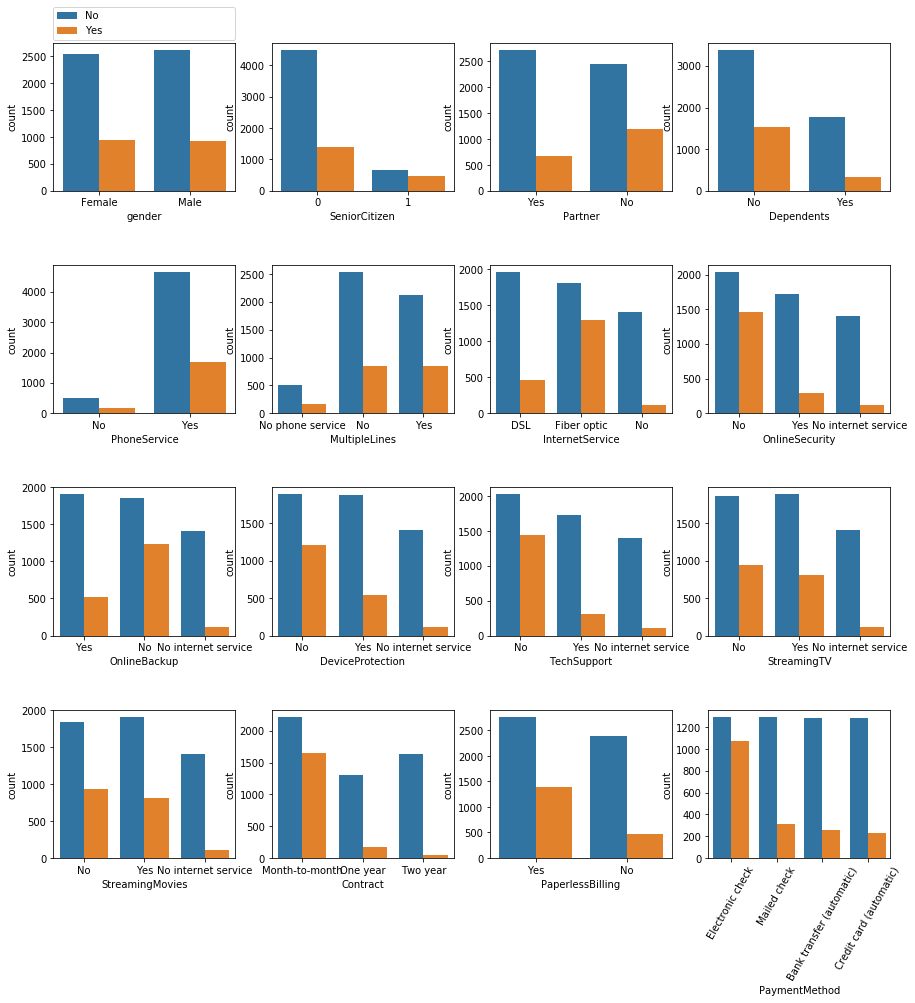

In [16]:
fig,ax = plt.subplots(4,4,figsize=(15,15))
fig.subplots_adjust(hspace=.5)
for i in range(0,16):
    g = sns.countplot(x=objectValues.iloc[:,i], hue=objectValues["Churn"], ax=ax[divmod(i,4)])
    g.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, mode="expand", borderaxespad=0.) if i==0 else g.legend_.remove()
for tick in ax[3,3].get_xticklabels():
    tick.set_rotation(60)

## Clearly indicating Month to month is a good candidate

In [17]:
df3 = pd.get_dummies(df)

In [18]:
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80
gender_Female,7032.0,0.495307,0.500014,0.00,0.0000,0.000,1.0000,1.00
gender_Male,7032.0,0.504693,0.500014,0.00,0.0000,1.000,1.0000,1.00
SeniorCitizen_0,7032.0,0.837600,0.368844,0.00,1.0000,1.000,1.0000,1.00
SeniorCitizen_1,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
Partner_No,7032.0,0.517491,0.499729,0.00,0.0000,1.000,1.0000,1.00
Partner_Yes,7032.0,0.482509,0.499729,0.00,0.0000,0.000,1.0000,1.00
Dependents_No,7032.0,0.701507,0.457629,0.00,0.0000,1.000,1.0000,1.00


In [19]:
cols = df3.shape[1]

X_train, X_test, y_train, y_test = train_test_split(df3.iloc[:,:cols-2], df3['Churn_Yes'], test_size=0.3, random_state=0)


# LINEAR KERNEL

In [20]:
kernelTime=[None]*3
import time

start = time.time()

clf = svm.LinearSVC()
clf.fit(X_train,y_train)
print('Train accuracy = {0}%'.format(np.round(clf.score(X_train, y_train) * 100, 2)))
print('Test accuracy = {0}%'.format(np.round(clf.score(X_test, y_test) * 100, 2)))
predictions = clf.predict(X_test)
print("\n Confusion Matrix: \n")
print(confusion_matrix(y_test.values, predictions))
print("\n Classification Report: \n")
print(classification_report(y_test.values, predictions))

end = time.time()
kernelTime[0] =(end - start)

Train accuracy = 47.38%
Test accuracy = 47.77%

 Confusion Matrix: 

[[ 501 1054]
 [  48  507]]

 Classification Report: 

             precision    recall  f1-score   support

          0       0.91      0.32      0.48      1555
          1       0.32      0.91      0.48       555

avg / total       0.76      0.48      0.48      2110



# RBF KERNEL

In [21]:
import time

start = time.time()

clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)
print('Train accuracy = {0}%'.format(np.round(clf.score(X_train, y_train) * 100, 2)))
print('Test accuracy = {0}%'.format(np.round(clf.score(X_test, y_test) * 100, 2)))
predictions = clf.predict(X_test)
print("\n Confusion Matrix: \n")
print(confusion_matrix(y_test.values, predictions))
print("\n Classification Report: \n")
print(classification_report(y_test.values, predictions))

end = time.time()
kernelTime[1] =(end - start)

Train accuracy = 91.37%
Test accuracy = 77.35%

 Confusion Matrix: 

[[1459   96]
 [ 382  173]]

 Classification Report: 

             precision    recall  f1-score   support

          0       0.79      0.94      0.86      1555
          1       0.64      0.31      0.42       555

avg / total       0.75      0.77      0.74      2110



# Optimizing RBF

In [30]:
from sklearn.svm import SVC
            
best_score = 0
for c in [1, 10, 100, 1000]:
    for gamma in [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5]:
        
        svc = SVC(kernel='rbf', C=c, gamma=gamma)

        svc.fit(X_train, y_train) 

        score = svc.score(X_test, y_test)
        if score > best_score:
            finalGamma = gamma
            finalC = c
            best_score = score
            print ("Score:", score, "C= ", c, "gamma = ", gamma)

Score: 0.788625592417 C=  1 gamma =  0.0001
Score: 0.791469194313 C=  10 gamma =  0.0001


In [31]:
clf = svm.SVC(kernel='rbf',C=finalC,gamma=finalGamma)
clf.fit(X_train, y_train)
print('Train accuracy = {0}%'.format(np.round(clf.score(X_train, y_train) * 100, 2)))
print('Test accuracy = {0}%'.format(np.round(clf.score(X_test, y_test) * 100, 2)))
predictions = clf.predict(X_test)
print("\n Confusion Matrix: \n")
print(confusion_matrix(y_test.values, predictions))
print("\n Classification Report: \n")
print(classification_report(y_test.values, predictions))

Train accuracy = 79.99%
Test accuracy = 79.15%

 Confusion Matrix: 

[[1433  122]
 [ 318  237]]

 Classification Report: 

             precision    recall  f1-score   support

          0       0.82      0.92      0.87      1555
          1       0.66      0.43      0.52       555

avg / total       0.78      0.79      0.78      2110



# SIGMOID KERNEL

In [22]:
import time

start = time.time()

clf = svm.SVC(kernel='sigmoid')
clf.fit(X_train, y_train)
print('Train accuracy = {0}%'.format(np.round(clf.score(X_train, y_train) * 100, 2)))
print('Test accuracy = {0}%'.format(np.round(clf.score(X_test, y_test) * 100, 2)))
predictions = clf.predict(X_test)
print("\n Confusion Matrix: \n")
print(confusion_matrix(y_test.values, predictions))
print("\n Classification Report: \n")
print(classification_report(y_test.values, predictions))

end = time.time()
kernelTime[2] =(end - start)

Train accuracy = 73.3%
Test accuracy = 73.7%

 Confusion Matrix: 

[[1555    0]
 [ 555    0]]

 Classification Report: 

             precision    recall  f1-score   support

          0       0.74      1.00      0.85      1555
          1       0.00      0.00      0.00       555

avg / total       0.54      0.74      0.63      2110



# Optimizing Sigmoid

In [28]:
from sklearn.svm import SVC
            
best_score = 0
for c in [0.1, 1, 10, 100, 1000]:
    for gamma in [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5]:
        
        svc = SVC(kernel='sigmoid', C=c, gamma=gamma)

        svc.fit(X_train, y_train) 

        score = svc.score(X_test, y_test)
        if score > best_score:
            finalC = c
            finalGamma = gamma
            best_score = score
            print ("Score:", score, "C= ", c, "gamma = ", gamma)

Score: 0.694786729858 C=  0.1 gamma =  0.0001
Score: 0.736966824645 C=  0.1 gamma =  0.001


In [29]:
clf = svm.SVC(kernel='rbf',C=finalC,gamma=finalGamma)
clf.fit(X_train, y_train)
print('Train accuracy = {0}%'.format(np.round(clf.score(X_train, y_train) * 100, 2)))
print('Test accuracy = {0}%'.format(np.round(clf.score(X_test, y_test) * 100, 2)))
predictions = clf.predict(X_test)
print("\n Confusion Matrix: \n")
print(confusion_matrix(y_test.values, predictions))
print("\n Classification Report: \n")
print(classification_report(y_test.values, predictions))

Train accuracy = 77.06%
Test accuracy = 76.73%

 Confusion Matrix: 

[[1500   55]
 [ 436  119]]

 Classification Report: 

             precision    recall  f1-score   support

          0       0.77      0.96      0.86      1555
          1       0.68      0.21      0.33       555

avg / total       0.75      0.77      0.72      2110



Text(0.5,1,'Performace of various kernels')

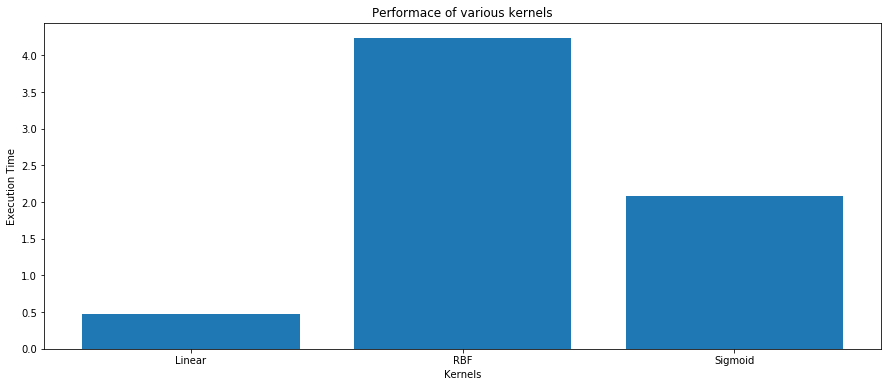

In [23]:
var = ['Linear','RBF','Sigmoid']
plt.bar(var,kernelTime)
plt.xlabel("Kernels")
plt.ylabel("Execution Time")
plt.title("Performace of various kernels")